In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8

In [ ]:
#define header
col=['DATE','TIME','CO_GT','PT08_S1_CO','NMHC_GT','C6H6_GT','PT08_S2_NMHC',
     'NOX_GT','PT08_S3_NOX','NO2_GT','PT08_S4_NO2','PT08_S5_O3','T','RH','AH']

In [ ]:
use=list(np.arange(len(col)))

In [ ]:
df_air=pd.read_csv('AirQualityUCI.csv',header=None,skiprows=1,names=col,na_filter=True,
                   na_values=-200,usecols=use)
df_air.head()

,DATE,TIME,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


In [ ]:
df_air.dropna(how='all',inplace=True)
#drop RH NAN rows
df_air.dropna(thresh=10,axis=0,inplace=True)

In [ ]:
df_air.describe()

,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,NOX_GT,PT08_S3_NOX,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH
count,7344.000000,8991.000000,887.000000,8991.000000,8991.000000,7396.000000,8991.000000,7393.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.129711,1099.833166,218.607666,10.083105,939.153376,242.189292,835.493605,112.145137,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.436472,217.080037,206.615130,7.449820,266.831429,206.312007,256.817320,47.629141,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,66.000000,4.400000,734.500000,97.000000,658.000000,77.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,145.000000,8.200000,909.000000,178.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.800000,1231.000000,297.000000,14.000000,1116.000000,321.000000,969.500000,140.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,333.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [ ]:
df_air['HOUR']=df_air['TIME'].apply(lambda x: int(x.split(':')[0]))
df_air.HOUR.head()

0    18
1    19
2    20
3    21
4    22
Name: HOUR, dtype: int64

In [ ]:
print('Count of missing values:\n',df_air.shape[0]-df_air.count())

Count of missing values:
 DATE               0
TIME               0
CO_GT           1647
PT08_S1_CO         0
NMHC_GT         8104
C6H6_GT            0
PT08_S2_NMHC       0
NOX_GT          1595
PT08_S3_NOX        0
NO2_GT          1598
PT08_S4_NO2        0
PT08_S5_O3         0
T                  0
RH                 0
AH                 0
HOUR               0
dtype: int64


In [ ]:
df_air['DATE']=pd.to_datetime(df_air.DATE, format='%m/%d/%Y')

In [ ]:
df_air.set_index('DATE',inplace=True)

In [ ]:
df_air['MONTH']=df_air.index.month     #Create month column (Run once)
df_air.reset_index(inplace=True)
#df_air.head()

In [ ]:
df_air.drop('NMHC_GT',axis=1,inplace=True)    #drop col


In [ ]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['MONTH','HOUR'])['NO2_GT'].transform('mean'))

In [ ]:
print('Left out missing value:',df_air.shape[0]-df_air.count() )

Left out missing value: DATE              0
TIME              0
CO_GT            30
PT08_S1_CO        0
C6H6_GT           0
PT08_S2_NMHC      0
NOX_GT          261
PT08_S3_NOX       0
NO2_GT          261
PT08_S4_NO2       0
PT08_S5_O3        0
T                 0
RH                0
AH                0
HOUR              0
MONTH             0
dtype: int64


In [ ]:
df_air['CO_GT']=df_air['CO_GT'].fillna(df_air.groupby(['HOUR'])['CO_GT'].transform('mean'))
df_air['NOX_GT']=df_air['NOX_GT'].fillna(df_air.groupby(['HOUR'])['NOX_GT'].transform('mean'))
df_air['NO2_GT']=df_air['NO2_GT'].fillna(df_air.groupby(['HOUR'])['NO2_GT'].transform('mean'))

<ipython-input-24-45a62550c356>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_air.corr(),annot=True,cmap='viridis')


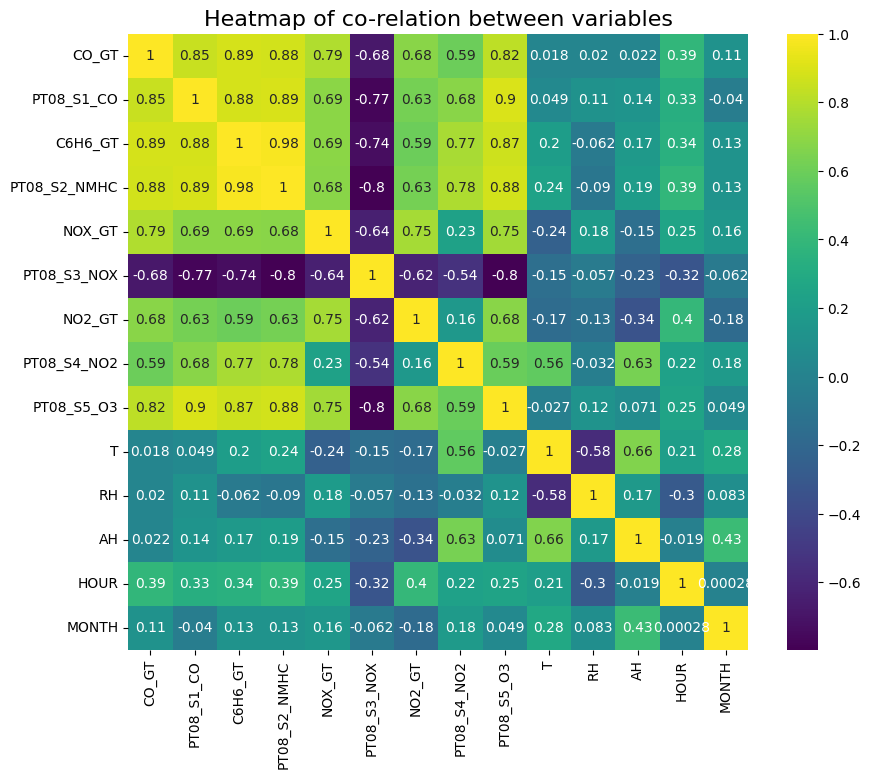

In [ ]:
sns.heatmap(df_air.corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

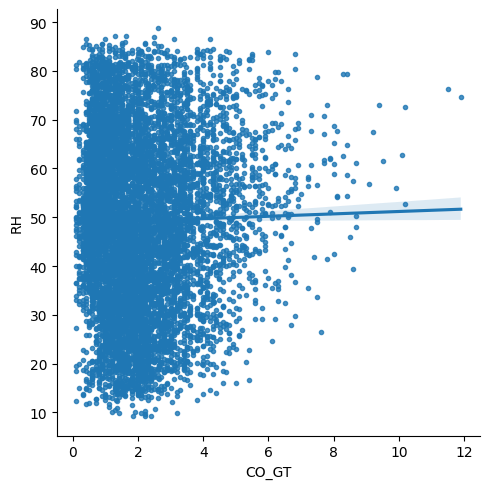

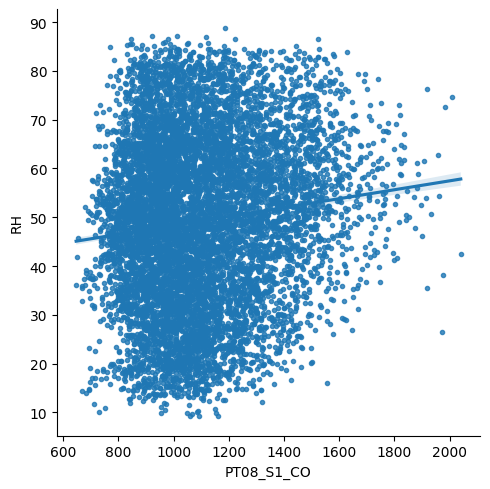

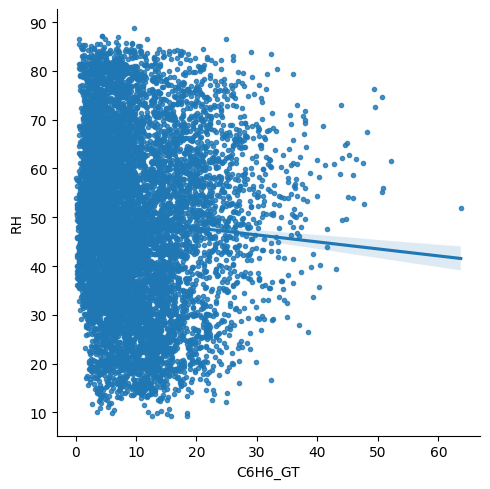

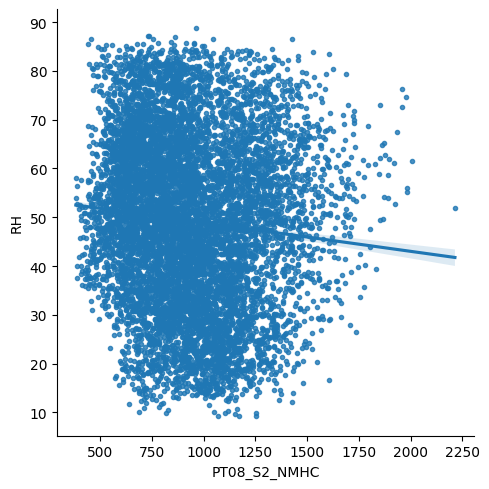

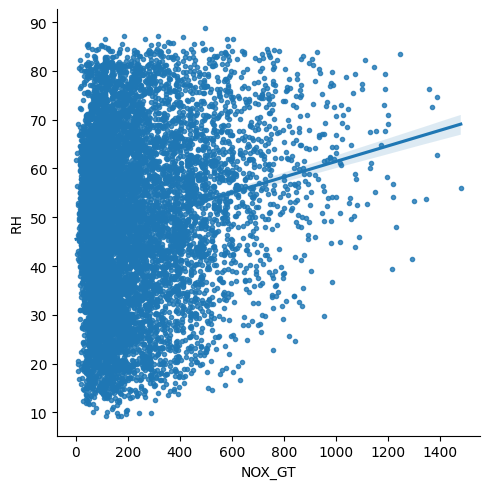

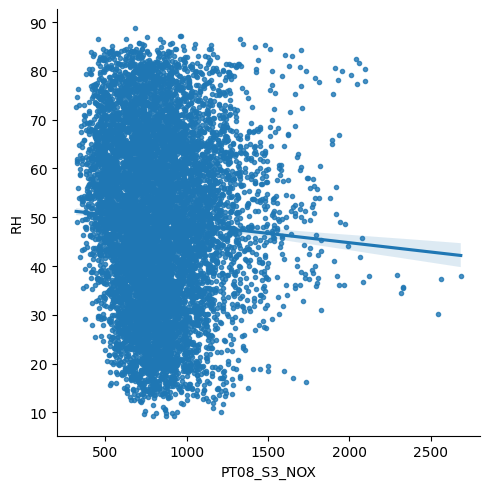

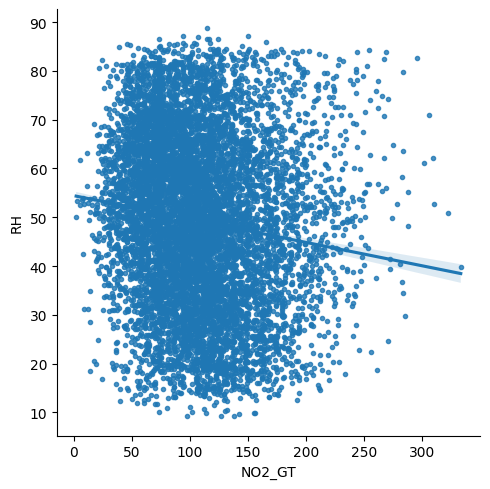

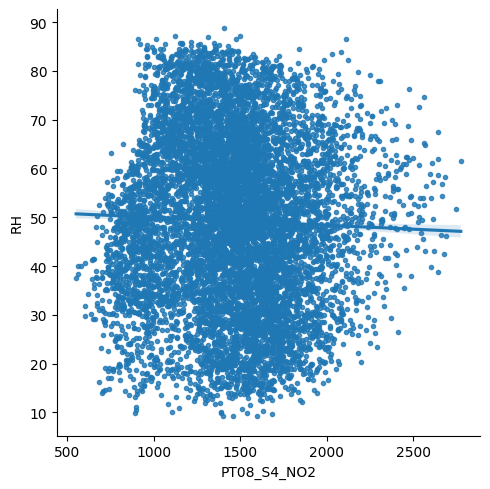

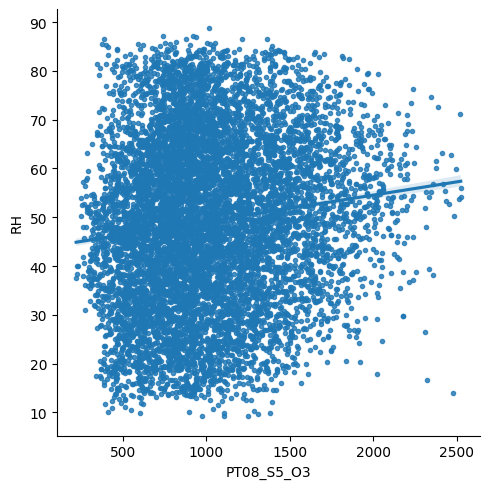

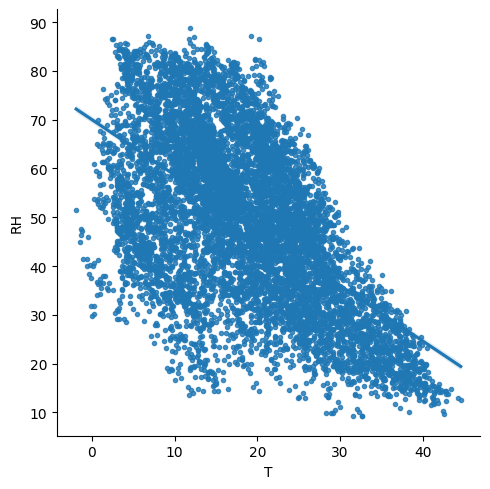

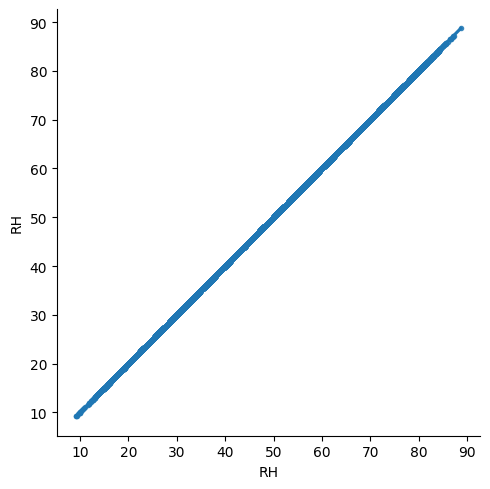

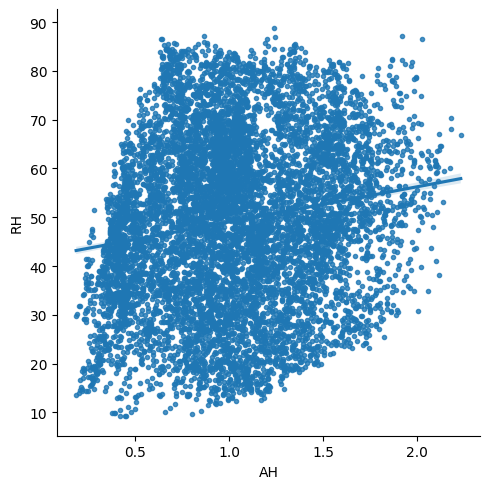

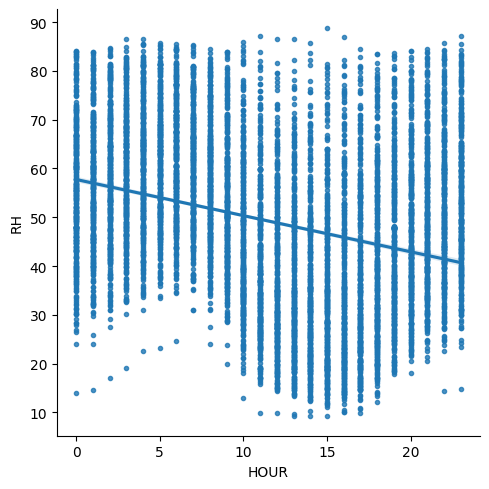

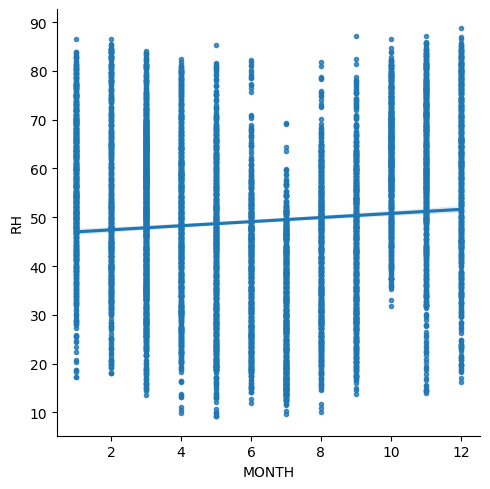

In [ ]:
#plot all X-features against output variable RH
col_=df_air.columns.tolist()[2:]
for i in df_air.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=df_air,markers='.')

In [ ]:
df_air['DATE'] = pd.to_datetime(df_air['DATE'])


In [ ]:
df_air['DATE'][0]

Timestamp('2004-03-10 00:00:00')

In [ ]:
df = df_air[['DATE', 'RH']]

In [ ]:
ts_data = df.set_index(['DATE'])


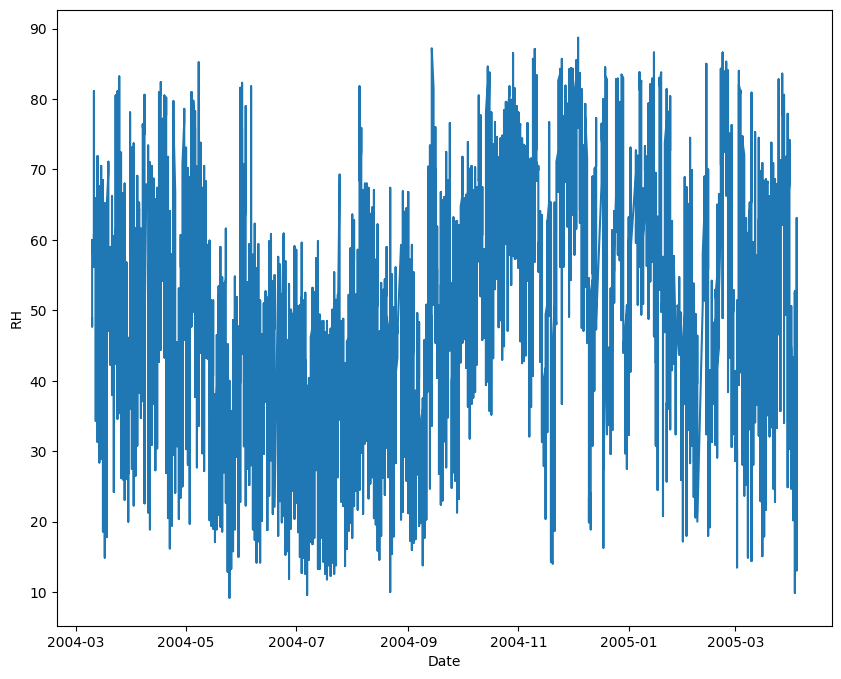

In [ ]:
plt.xlabel("Date")
plt.ylabel("RH")
plt.plot(ts_data)

In [ ]:
rol_mean = ts_data.rolling(window=12).mean()
rol_std = ts_data.rolling(window=12).std()

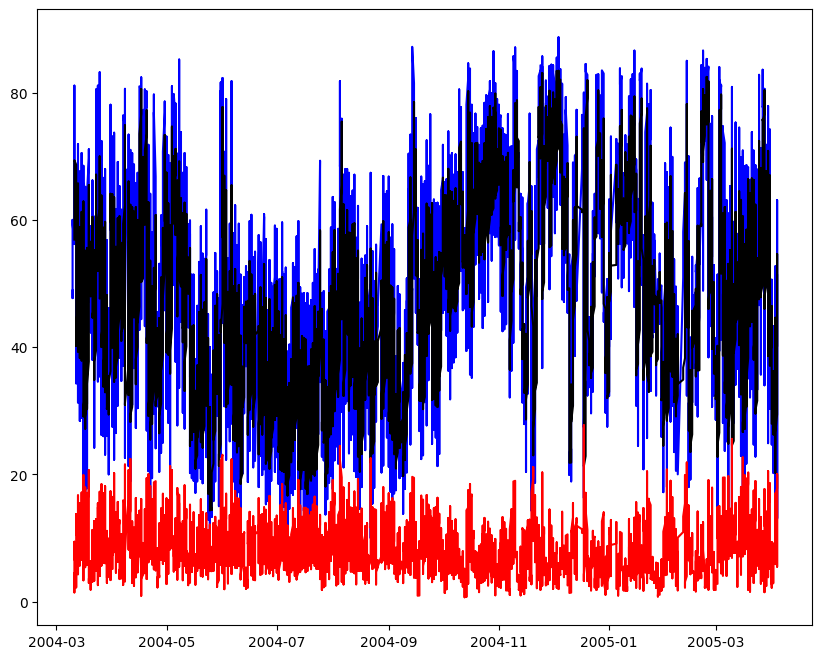

In [ ]:
plt.plot(ts_data, c='blue')
plt.plot(rol_mean, c='black')
plt.plot(rol_std, c='red')

In [ ]:
from statsmodels.tsa.stattools import adfuller
dftest= adfuller(ts_data['RH'])
print(dftest)

(-7.880267285599366, 4.723381733371096e-12, 29, 8961, {'1%': -3.4310799602965787, '5%': -2.861862594910227, '10%': -2.5669417122496907}, 49762.71749704997)


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(x=ts_data['RH'], model='additive', extrapolate_trend='freq', period=1)

In [ ]:
trend= decompose.trend
season = decompose.seasonal

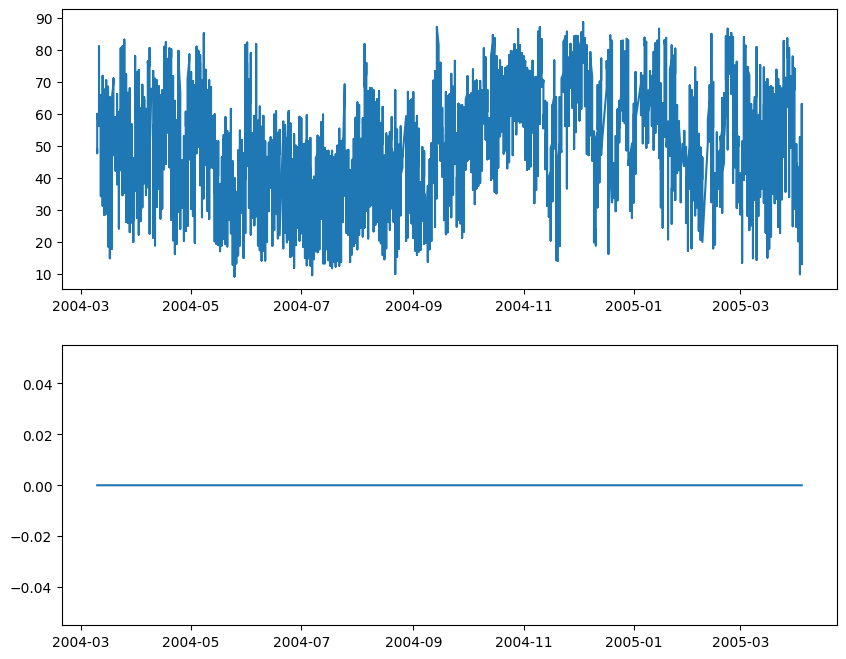

In [ ]:
plt.subplot(211)
plt.plot(trend)
plt.subplot(212)
plt.plot(season)

In [ ]:
ts_data_new = ts_data['RH'] - ts_data['RH'].shift(2)


In [ ]:
adfuller(ts_data_new.dropna())


(-19.71784195954536,
 0.0,
 37,
 8951,
 {'1%': -3.431080776037606,
  '5%': -2.8618629553702966,
  '10%': -2.5669419041246435},
 49981.85154525638)

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

acf_plot = acf(ts_data_new.dropna())
pacf_plot = pacf(ts_data_new.dropna())

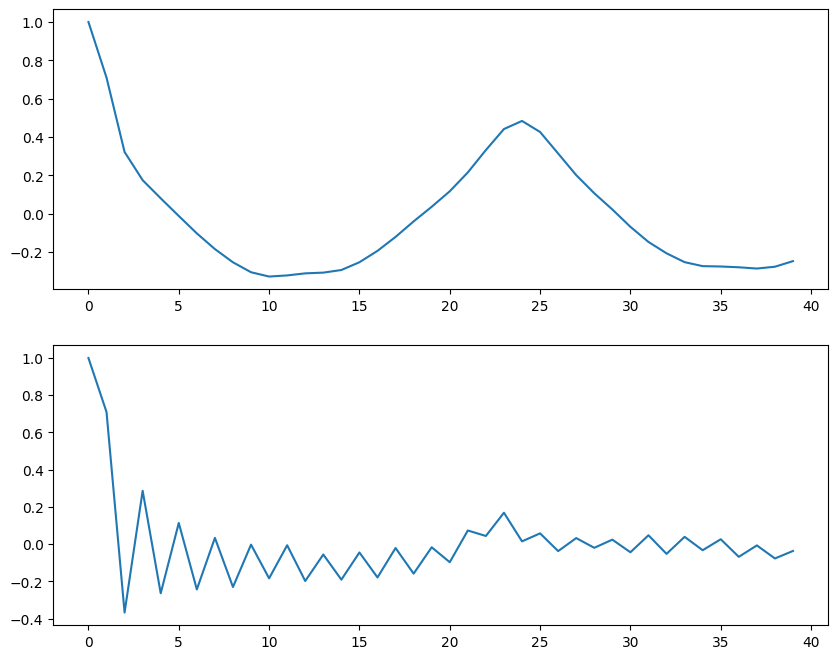

In [ ]:
plt.subplot(211)
plt.plot(acf_plot)
plt.subplot(212)
plt.plot(pacf_plot)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_data, seasonal_order=(2,2,1,12))
model_fit = model.fit()

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
res = model_fit.forecast(24)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
res = pd.DataFrame(res)
res.columns=['RH']
ts_data_pred = pd.DataFrame(ts_data)
ts_data_pred = ts_data_pred.append(res)

<ipython-input-43-960959021b78>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ts_data_pred = ts_data_pred.append(res)


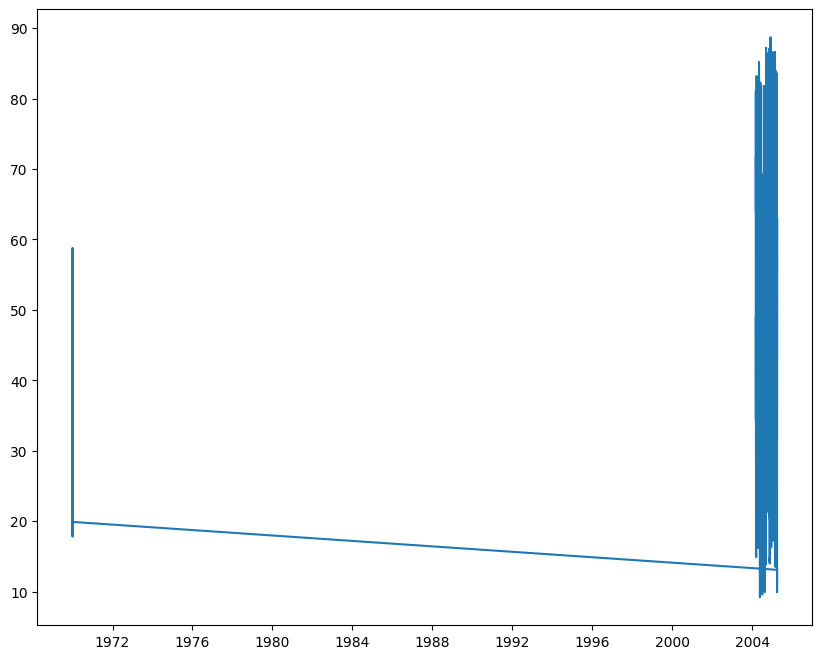

In [ ]:
plt.plot(ts_data_pred)
